## Word embedding

In [4]:
import pandas as pd

In [5]:
df = pd.read_json('posts.json')

In [6]:
df

,descripcion,fecha
0,Here we have the lead trends for 2022!!!▪️Arti...,17/12/2021
1,It’s almost 2022 and we want to share the AI l...,15/12/2021
2,"""...Here we [...] demonstrate a method by whic...",10/12/2021
3,The limit of RPA is the imagination of the pro...,9/12/2021
4,Introducing an indoor garden controlled with a...,2/12/2021
...,...,...
266,Have you seen the future of the creative proce...,27/3/2023
267,It's fascinating how our understanding of brai...,29/3/2023
268,This is a summary of our last article: Artific...,30/3/2023
269,Nature has inspired a lot of innovations from ...,31/3/2023


In [7]:
corpus=df["descripcion"].values.tolist()
print(corpus)

['Here we have the lead trends for 2022!!!▪️Artificial Intelligence ▪️Data and Analytics ▪️RPAWhich one will you implement in your business?', 'It’s almost 2022 and we want to share the AI lead trends for the future year!  #ai #share #future #aitrends #artificialintelligence #digitaltrasnformation', '"...Here we [...] demonstrate a method by which #machinelearning can aid mathematicians in discovering new #conjectures and #theorems ..."That\'s simply amazing how things are evolving in this field!', 'The limit of RPA is the imagination of the programmer! 🤖▪️Can you tell us a RPA out of the box application? Juan Carlos Castaño Valencia Diana Cristhina Pérez Pérez Fabian Esteban Peña Castillo #artificialintelligence #datascience #computerscience #rpa #aix #ai #computervision #machinelearning #nlp#uxdesign #uidesign #rpa #robotprocessautomation#robotprogramming #creativedevelopment #inspiring #sentences', 'Introducing an indoor garden controlled with an app and AI to enjoy fresh vegetables

## Tokenizacion sin lemattizer 

In [8]:
import nltk
nltk.download('punkt')


corpus_tok = [nltk.word_tokenize(sent) for sent in corpus]
corpus_tok

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wdmoreno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['Here',
  'we',
  'have',
  'the',
  'lead',
  'trends',
  'for',
  '2022',
  '!',
  '!',
  '!',
  '▪️Artificial',
  'Intelligence',
  '▪️Data',
  'and',
  'Analytics',
  '▪️RPAWhich',
  'one',
  'will',
  'you',
  'implement',
  'in',
  'your',
  'business',
  '?'],
 ['It',
  '’',
  's',
  'almost',
  '2022',
  'and',
  'we',
  'want',
  'to',
  'share',
  'the',
  'AI',
  'lead',
  'trends',
  'for',
  'the',
  'future',
  'year',
  '!',
  '#',
  'ai',
  '#',
  'share',
  '#',
  'future',
  '#',
  'aitrends',
  '#',
  'artificialintelligence',
  '#',
  'digitaltrasnformation'],
 ['``',
  '...',
  'Here',
  'we',
  '[',
  '...',
  ']',
  'demonstrate',
  'a',
  'method',
  'by',
  'which',
  '#',
  'machinelearning',
  'can',
  'aid',
  'mathematicians',
  'in',
  'discovering',
  'new',
  '#',
  'conjectures',
  'and',
  '#',
  'theorems',
  '...',
  "''",
  'That',
  "'s",
  'simply',
  'amazing',
  'how',
  'things',
  'are',
  'evolving',
  'in',
  'this',
  'field',
  '!'],
 ['

In [9]:
words = ['algorithm', 'bias', 'big data', 'coding', 'computer', 'cybersecurity', 'data', 'digital divide', 'discrimination', 'ethics', 'gender', 'internet', 'machine learning', 'privacy', 'programming', 'robot', 'software', 'technology']
bias_words = ['ageism', 'ableism', 'racism', 'sexism', 'heterosexism', 'homophobia', 'transphobia', 'colorism', 'lookism', 'sizeism', 'classism', 'xenophobia']
words2 = ['Manpower', 'Chairman', 'Businessman', 'Freshman', 'Journeyman', 'Salesman', 'Mankind', 'Right-hand man', 'Workmanlike', 'Policeman', 'Fireman', 'Postman', 'Forefathers', 'Craftsman', 'Repairman', 'Mansplain', 'He', "She","him","her", 'Artificial Intelligence']
total_words=list(set(words+bias_words+words2))
total_words

['him',
 'He',
 'big data',
 'Journeyman',
 'data',
 'Mansplain',
 'Forefathers',
 'ageism',
 'algorithm',
 'Manpower',
 'computer',
 'privacy',
 'robot',
 'ethics',
 'xenophobia',
 'machine learning',
 'Right-hand man',
 'racism',
 'Policeman',
 'gender',
 'bias',
 'Chairman',
 'classism',
 'She',
 'Fireman',
 'Salesman',
 'sexism',
 'cybersecurity',
 'discrimination',
 'Postman',
 'Artificial Intelligence',
 'her',
 'internet',
 'ableism',
 'heterosexism',
 'digital divide',
 'sizeism',
 'colorism',
 'Freshman',
 'transphobia',
 'lookism',
 'software',
 'technology',
 'homophobia',
 'Workmanlike',
 'Mankind',
 'coding',
 'Businessman',
 'Craftsman',
 'Repairman',
 'programming']

In [10]:
from gensim.models import Word2Vec

# Define los parámetros de tu modelo personalizado
vector_size = 100
window_size = 5

# Construye el vocabulario de tu modelo utilizando las palabras del corpus tokenizado
model = Word2Vec(corpus_tok, vector_size=vector_size, window=window_size, min_count=1)

# Entrena el modelo Word2Vec con el corpus tokenizado
model.train(corpus_tok, total_examples=len(corpus_tok), epochs=500)

# Guarda el modelo entrenado para su uso posterior
model.save("mi_modelo_word2vec.model")

In [11]:
vector = model.wv['nlp']
vector

array([-0.32739007,  0.4296497 ,  2.157926  , -0.20897585,  1.3406112 ,
        1.9383464 , -0.5429175 ,  4.1330447 , -0.39392343, -1.4805983 ,
       -0.5681751 , -3.191062  , -3.9349961 ,  1.7041361 ,  1.4142839 ,
       -1.1472276 , -1.6687435 , -2.2855563 ,  0.05867815, -1.4525316 ,
       -1.0707916 ,  1.3535593 , -1.2968514 , -3.227592  , -3.7530563 ,
       -1.1459255 , -0.33149368, -1.7851117 , -1.9298362 ,  0.7113287 ,
        2.2561693 ,  0.7885809 , -1.2579335 , -0.8980741 , -1.7041601 ,
        0.15695189,  1.1200325 ,  0.30760047,  2.3643157 , -1.0673118 ,
        0.86442673,  1.3809444 ,  1.3950969 ,  0.5140106 ,  1.8515921 ,
        2.5228245 , -0.41733375, -1.0600753 ,  3.2062833 , -0.5800124 ,
       -1.4046063 ,  0.29688466,  2.4710586 ,  0.05043594, -0.21099742,
        0.27185705, -0.81519544,  2.5208428 ,  1.5637958 , -1.2499863 ,
        0.19889   ,  2.234867  , -0.9856527 , -1.0836463 , -1.1782806 ,
       -1.9468385 ,  2.1193526 ,  1.3344713 ,  0.7429054 , -0.68

In [12]:
similares = model.wv.most_similar('chatbot')
similares

[('customerservice', 0.8153971433639526),
 ('💻📲', 0.8010923862457275),
 ('diversity', 0.782680332660675),
 ('gamification', 0.780680239200592),
 ('bullying', 0.7468525767326355),
 ('🚫', 0.7339083552360535),
 ('bullyingawareness', 0.7233549952507019),
 ('harrypotter', 0.7214725017547607),
 ('stopbullying', 0.7108912467956543),
 ('nomorebullying', 0.6702125072479248)]

In [13]:
similares = model.wv.most_similar('equinoxailab')
similares

[('#', 0.6410622000694275),
 ('dataethics', 0.563813328742981),
 ('chatbot', 0.5487203001976013),
 ('facedetection', 0.540370762348175),
 ('maythe4th', 0.5402385592460632),
 ('nytimes', 0.5330188274383545),
 ('gpt3', 0.5270697474479675),
 ('bingai', 0.5255388021469116),
 ('OpenAI', 0.525519847869873),
 ('dataanalytics', 0.5188083052635193)]

In [14]:
similitud = model.wv.similarity('chatbot', 'nlp')
similitud

0.27919105

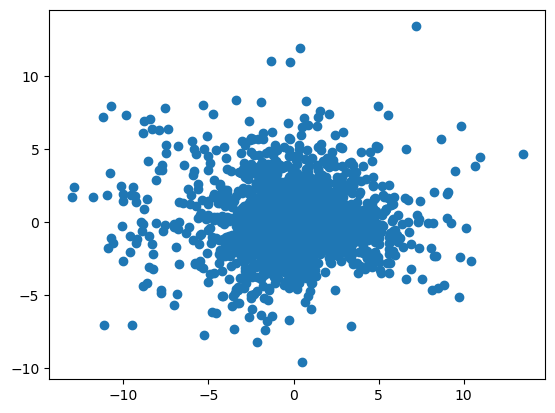

In [15]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# cargar modelo entrenado
model = Word2Vec.load("mi_modelo_word2vec.model")

# obtener vectores de palabras entrenados por Word2Vec
word_vectors = model.wv.vectors

# aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(word_vectors)

# graficar los componentes principales
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.show()


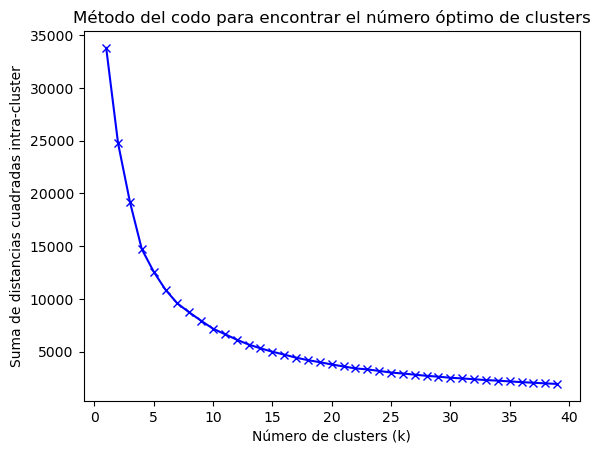

In [16]:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# crear una lista vacía para almacenar las sumas de las distancias cuadradas intra-cluster
sum_of_squared_distances = []

# realizar k-means clustering para diferentes valores de k
K = range(1, 40)
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit(principal_components)
    sum_of_squared_distances.append(k_means.inertia_)

# graficar la suma de las distancias cuadradas intra-cluster para diferentes valores de k
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de distancias cuadradas intra-cluster')
plt.title('Método del codo para encontrar el número óptimo de clusters')
plt.show()


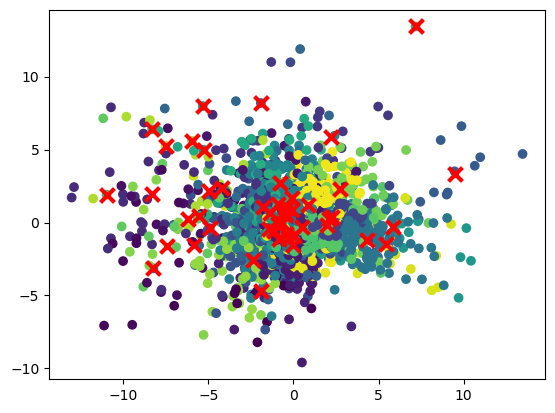

In [17]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# cargar modelo entrenado
model = Word2Vec.load("mi_modelo_word2vec.model")

# obtener vectores de palabras entrenados por Word2Vec
word_vectors = model.wv.vectors

# aplicar PCA
pca = PCA(n_components=100)
principal_components = pca.fit_transform(word_vectors)

# aplicar k-means
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(principal_components)

# graficar los resultados de k-means
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, linewidths=3, color='r')
plt.show()


In [18]:
# obtener las etiquetas de los clusters para cada punto en el espacio 2D producido por PCA
labels = kmeans.predict(principal_components)

# crear un diccionario para almacenar las palabras por cluster
clusters = {}

# agregar cada palabra al cluster correspondiente
for i, word in enumerate(model.wv.index_to_key):
    cluster = labels[i]
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(word)

# imprimir palabras por cluster
for cluster, words in clusters.items():
    print(f"Cluster {cluster}: {words}")



Cluster 14: ['#', 'artificialintelligence', 'equinoxailab', 'ai', 'datascience', 'machinelearning', 'computerscience', 'rpa', 'dataanalytics', 'quantumcomputing', 'datascientist']
Cluster 6: ['!', ',', 'to', 'the', 'and', 'you', 'in', 'our', 'AI', 'of', '?', 'with', 'for', 'we', 'your', 'that', 'about', '’', 'how', 'We', ')', '(', 'on', 'all', ';', 'but', 'best', 'If', 'who', 'path']
Cluster 13: ['.', 'The', 'most', '▪️The', 'used', 'He', 'better', 'She', 'also', 'coming', 'enjoys', 'called', 'important', 'emerging', '▪️It', 'key', 'able', 'step', 'very', 'complete', 'Which', 'related', 'starting', 'accurate', 'never', 'trading', 'whether', 'easy', 'beer', 'Chocolate', 'There', 'goal', 'around', 'face', 'telemedicine', 'implemented', '📢', 'changing', 'off', 'real', '▪️She', 'Valentine', 'crew', 'focus', 'increasingly', 'ally', 'welcome', 'incredible', 'revolution', 'finally', 'trend', 'ended', 'Cancer', 'Day…', 'Sciencist', 'expected', 'vital', 'automated.Automate', 'Every', 'toward', 